BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits. 

they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

##### Which variables are significant in predicting the demand for shared bikes.
##### How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
##### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


Data Preparation:

#### You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.



## Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data cleaning 

In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()
# there are no null entries in the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.drop_duplicates(subset=None, inplace=True)
bike.info()
# No Duplicate enteries in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [6]:
# dteday is object type lets convert to date type and pick out month column & year column
bike['dteday'] =  pd.to_datetime(bike['dteday'])
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# identifying the categorical columns 
print(bike.holiday.value_counts())
print(bike.workingday.value_counts())
print(bike.season.value_counts())
print(bike.weathersit.value_counts())
print(bike.mnth.value_counts())
print(bike.weekday.value_counts())

0    709
1     21
Name: holiday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64


#### From analyzing above  and describe output
- on analyzing columns like holiday , workingday ,season ,weathersit ,mnth & weekday they belong to categorical. 
- holiday,workingday seems to 1/0
- season seems to be 1-4 we need to convert to categorical using data dictionary give.
- weathersit same as season . need conversion 
- mnth and weekday need similar conversion as above. 

In [8]:
## season, weathersit , mnth , weekday, holiday and workingday are categorical variable. lets convert them into category type using the data dict given.
## converting as category can help as draw plot on all these column together.
season = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
month = lambda x : calendar.month_name[x]
weather = { 1: "Clear" ,2: "Mist", 3: "Light_Snow" ,4: "Heavy_Rain"}
weekday = lambda x : calendar.day_name[(x+1)%7]

bike['season'] = bike['season'].map(season).astype('category')
bike['weathersit'] = bike['weathersit'].map(weather).astype('category')
bike['mnth'] = bike['mnth'].map(month).astype('category')
bike['weekday'] = bike['weekday'].map(weekday).astype('category')
bike['holiday'] = bike.holiday.astype('category')
bike['workingday'] = bike.workingday.astype('category')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,January,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Removing the Unnecessarry columns from the dataset

In [9]:
# Lets remove columns such as Instant , dteday , casual , registerd
# 1. Instant - As it is a unique row idnetifier we dont need for modeling 
# 2. dteday - As we have Yr, mnth column already present we dont need dteday column
# 3. AS cnt column represents sum of casual & registered. And cnt represents as target variable.

bike.drop(['instant','dteday','casual','registered'] , inplace=True, axis =1)

In [10]:
num_columns = bike.select_dtypes('number').columns

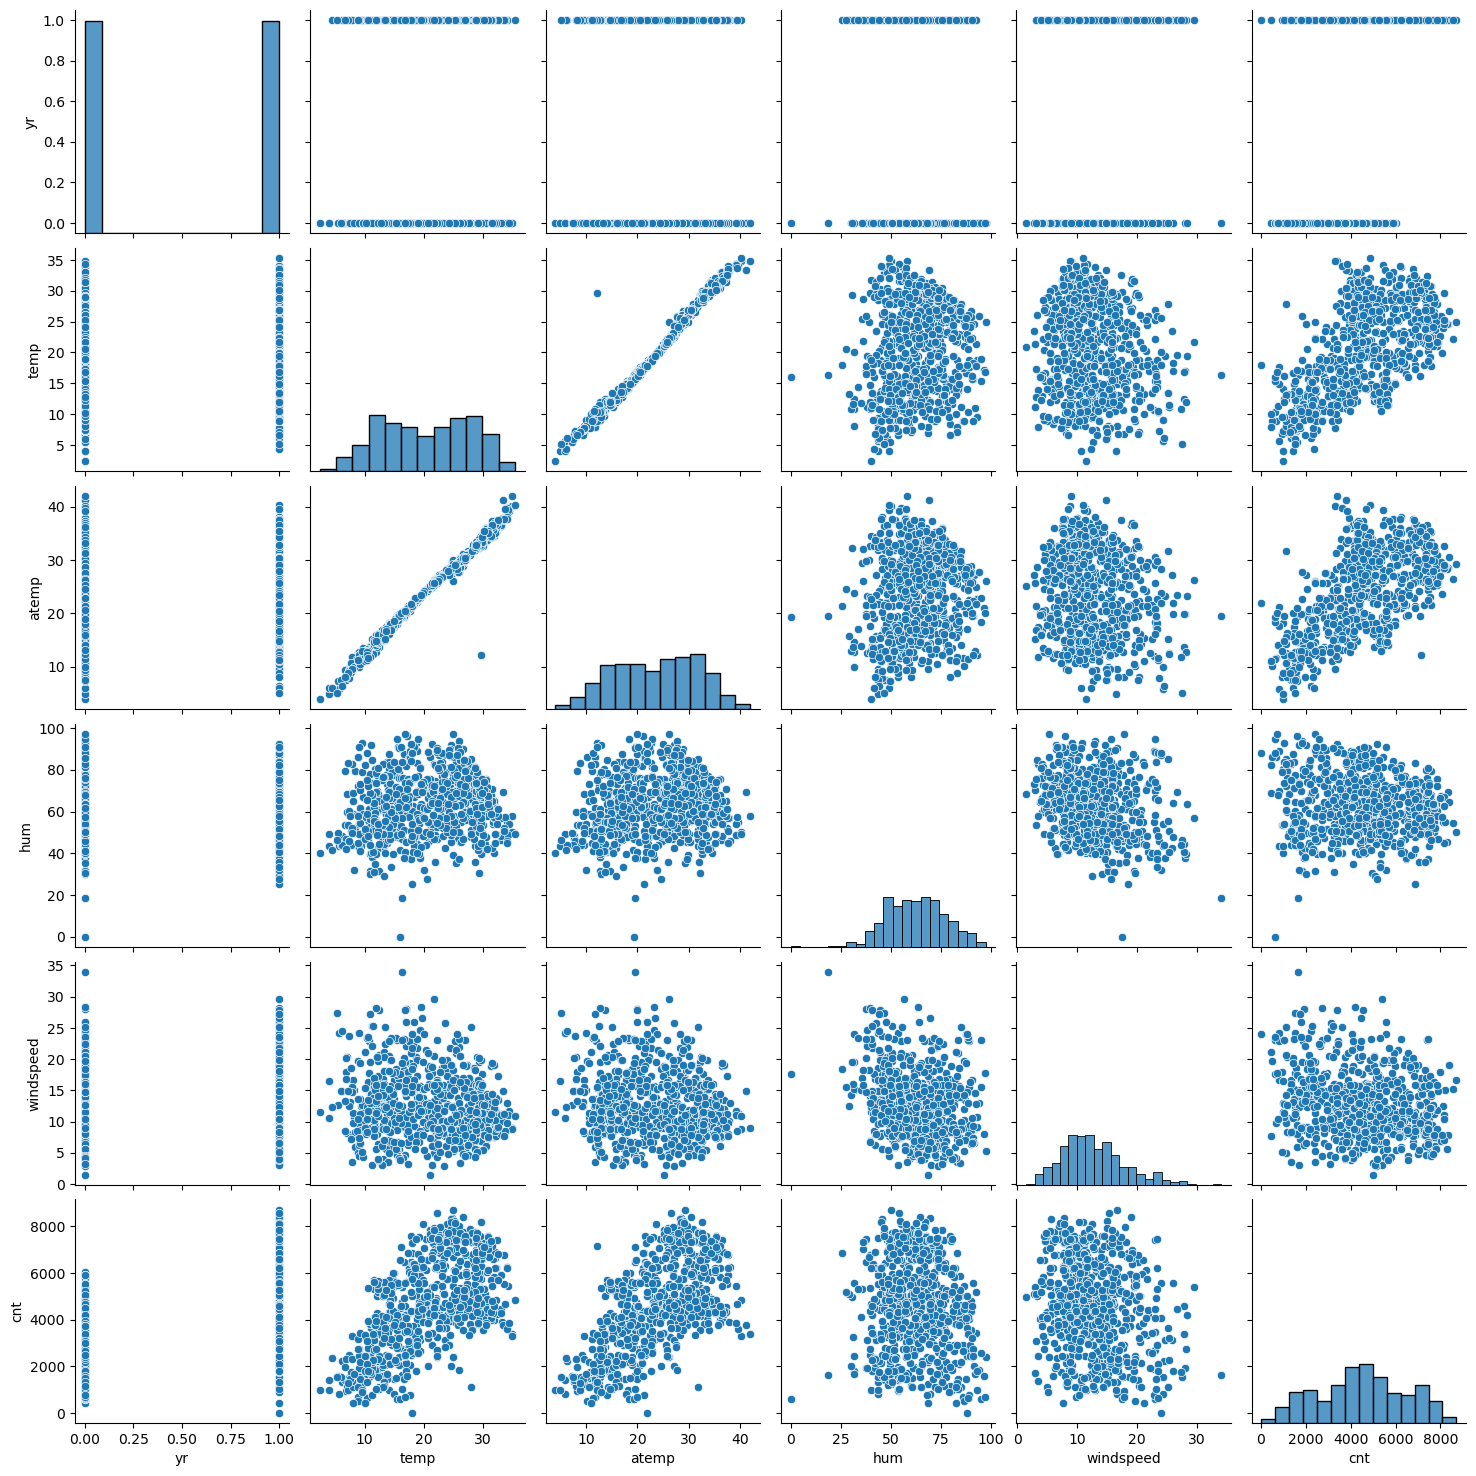

In [11]:
sns.pairplot(data=bike[num_columns])
plt.show()

#### Analyzing are prerdicator variable making any linear relationship with target variable cnt
    - cnt and temp seems to have linear relationship
    - cnt and atemp also have similar linear relationship as temp. this might be due to both temp and atemp are highly corrrelated. we can take out one of the variable, that can be decided based on VIF value.
    

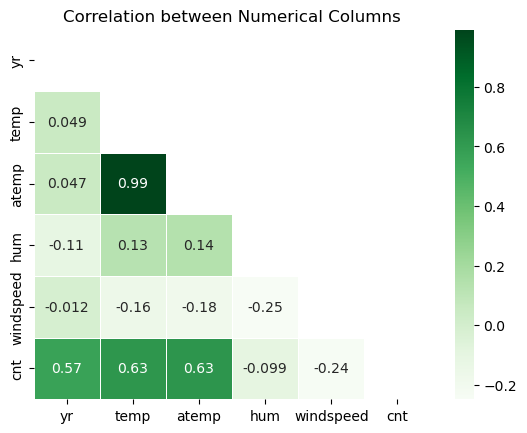

In [12]:
corr = bike[num_columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, linewidth=.5 , mask=mask , cmap="Greens")
plt.title("Correlation between Numerical Columns")
plt.show()

#### Summary
- tmp and cnt have high correlation. 
- windspeed have (-0.24) negative correlation with cnt. less windspeed better cnt
- There is high correlation between temp & atemp
- Because of multicolinearity ,we have to remove atemp column

In [13]:
# lets drop and update the numerical_column for future use
bike.drop('atemp',axis=1,inplace=True)   
num_columns = bike.select_dtypes('number').columns

In [14]:
# picking the columns of categorical type to analyzing against the target variable
cat_column = bike.select_dtypes('category').columns
print("Total catogorical column",len(cat_column))

Total catogorical column 6


In [15]:
# Function to plot boxplot
def  plot_box(hue=None,label=None):
    plt.figure(figsize=(20, 20))
    plt_index=1
    for cat in cat_column:
        plt.subplot(3,2,plt_index)
        sns.boxplot(x=cat,y='cnt',data=bike,hue =hue)
        plt.xticks(rotation=45)
        if label is not None:
            plt.legend(labels=[2018,2019])
        plt_index+=1
    plt.show()

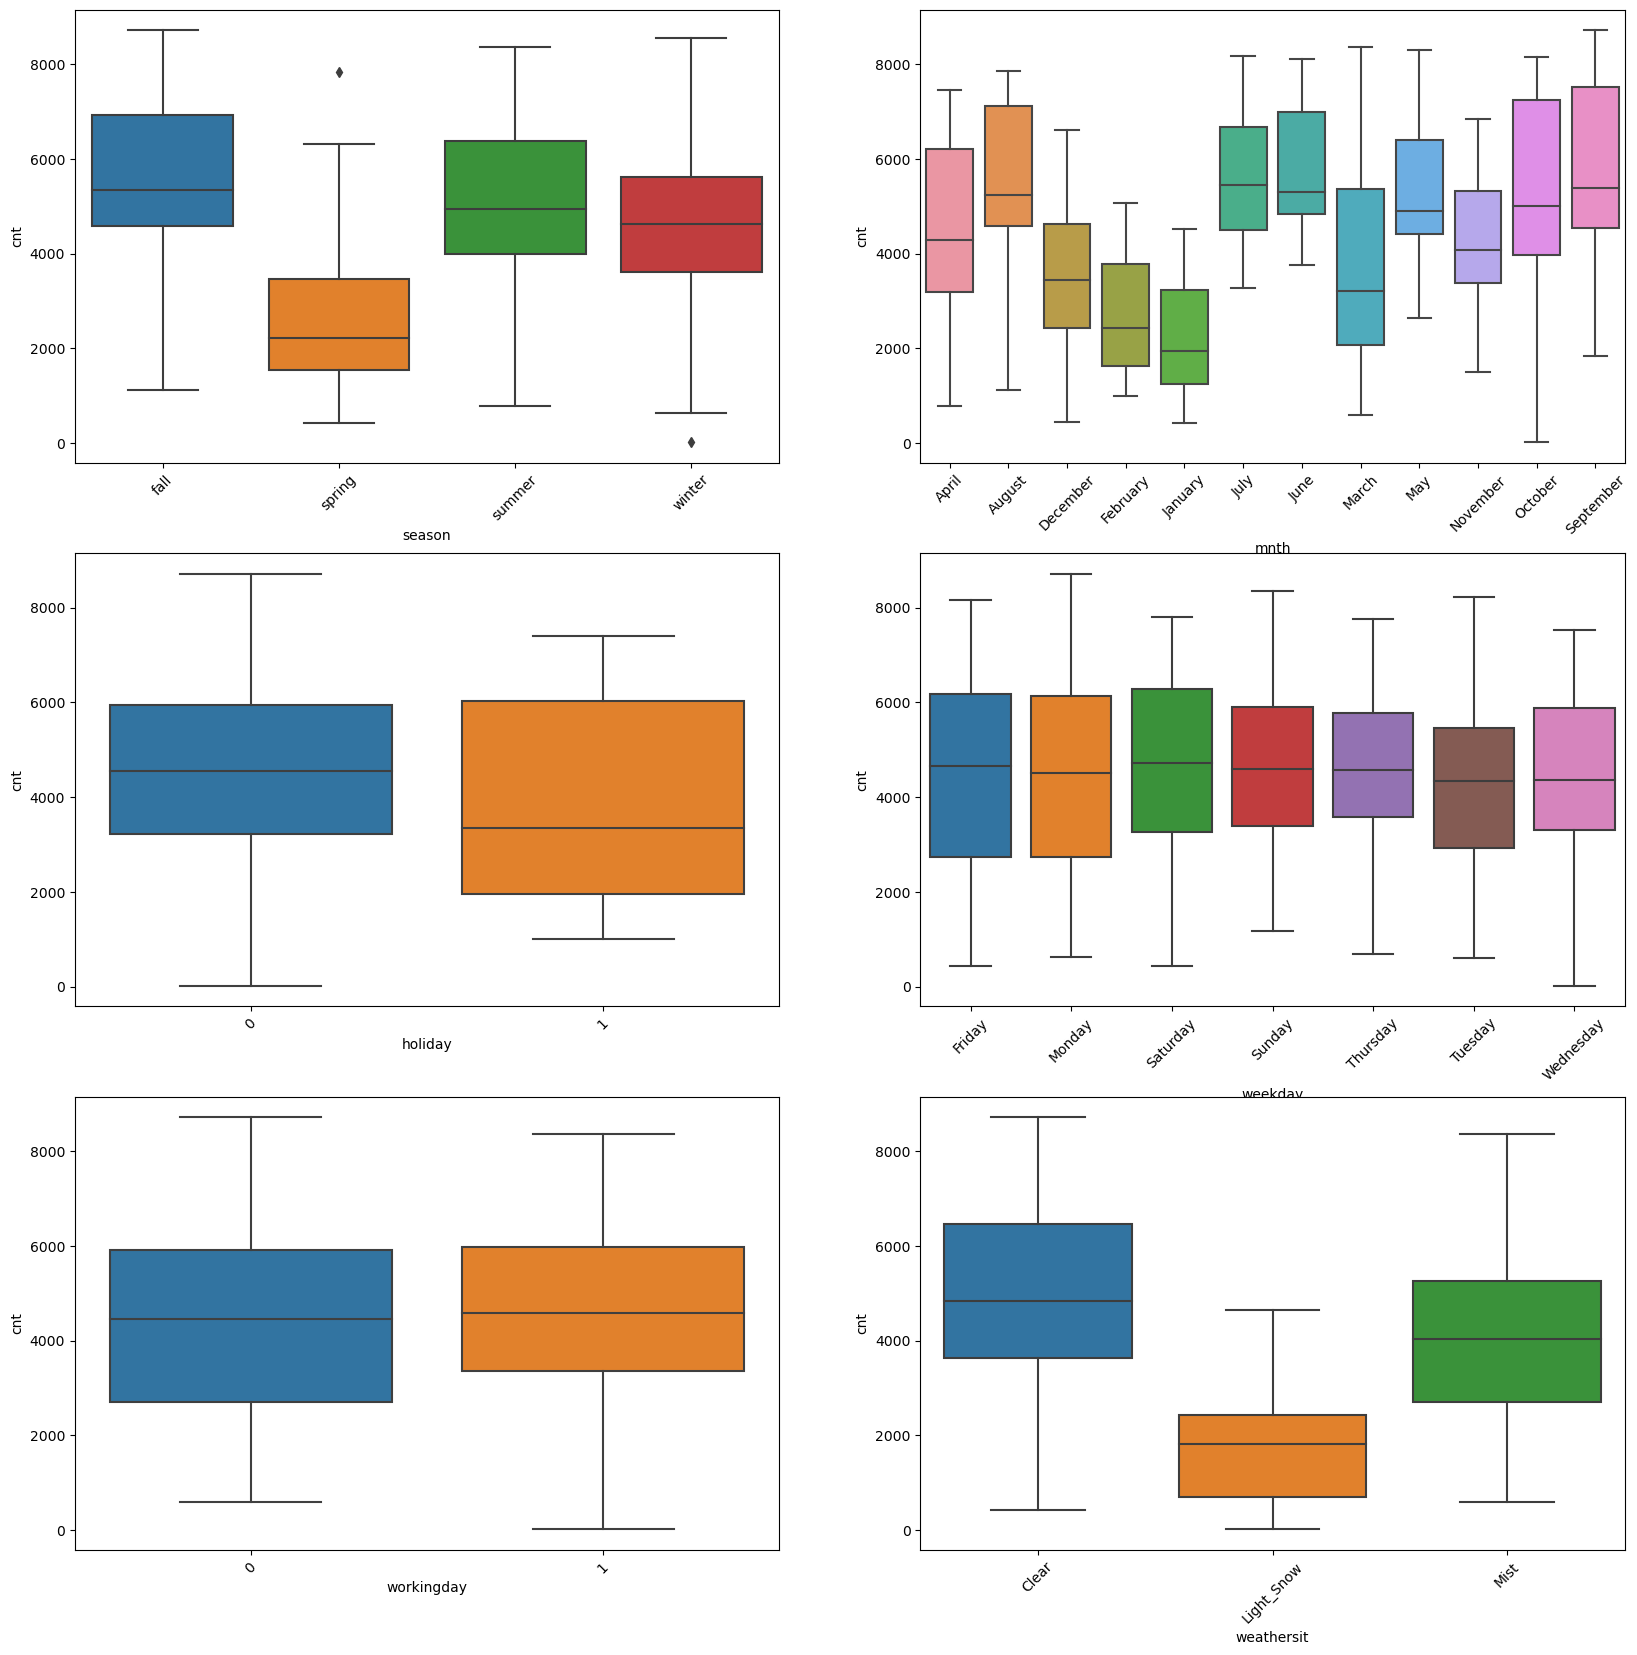

In [16]:
plot_box()


Analyzing categorical variables againsts the target variable
- Season Fall has the highest cnt across all season.
- August Septmenber October seem to have higer cnt. which correlate with Fall season.
- No major change in cnt on holidays.
- No major change in cnt for weekday.
- No major change in cnt for wroking day.
- During Clear weather there is a hight cnt.

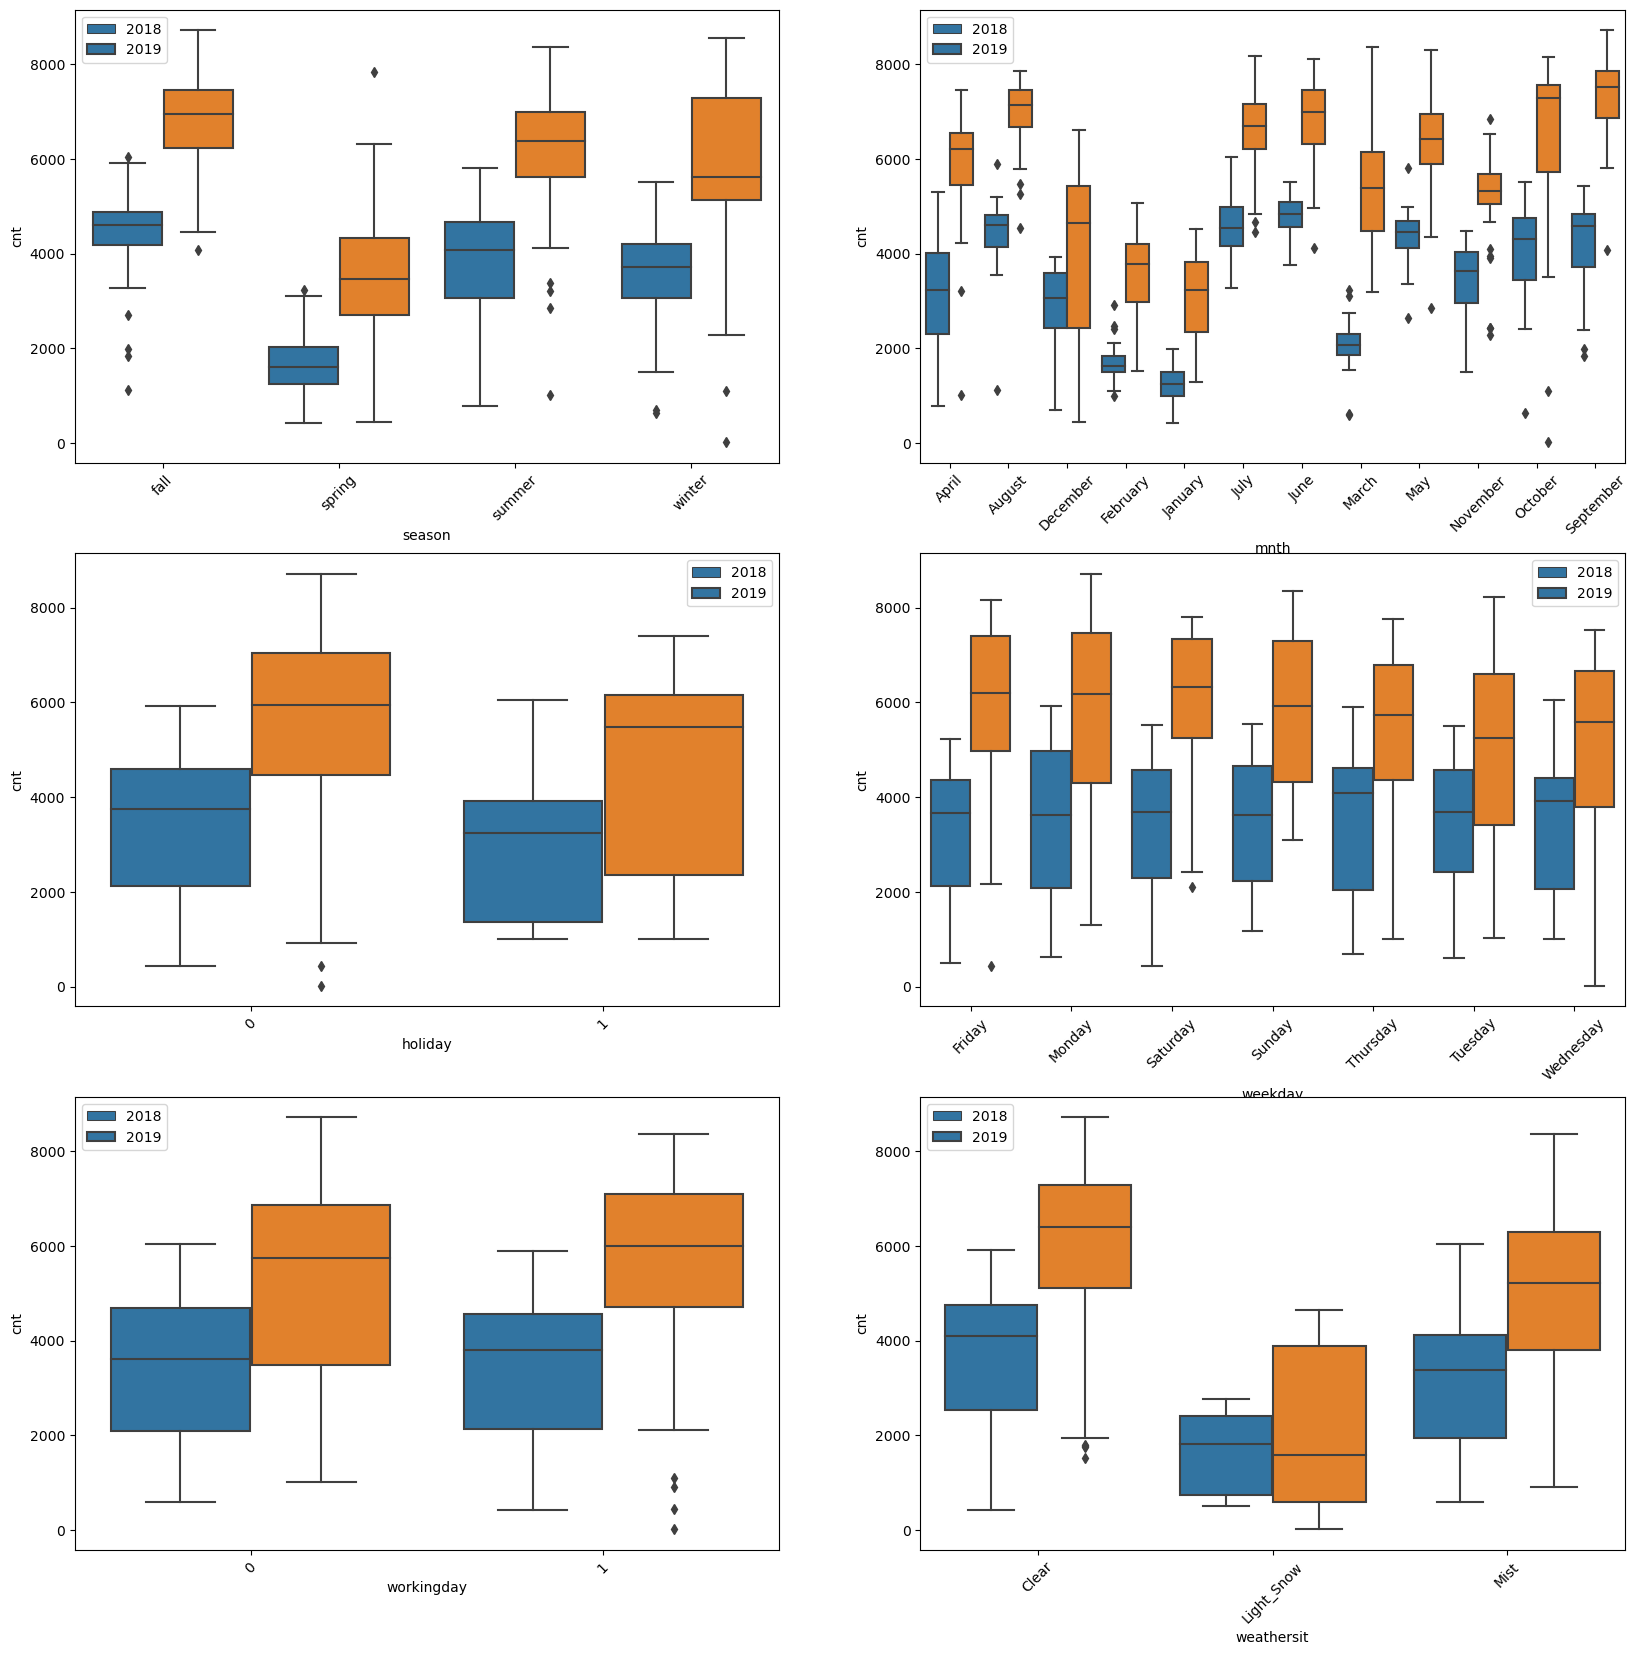

In [17]:
plot_box(hue='yr',label=[2018,2019])

#### Analyzing categorical variables againsts the target variable
    - In general there is a increase in the cnt year on year for all categories.
    - In season plot , fall has the highest cnt on year on year.
    - In Month plot, june has the higest cnt , august and july are close by in 2018. In 2019, september seems to be prefered month.
    - In holiday plot, mean is higher for cnt during holiday. 
    - In weekday, 2018 wednesday & sunday are preferred days . in 2019 friday & sunday seems to be preffered days.
    - WorkingDays are preferred 
    - In weathersit plot, Clear, Few clouds, Partly cloudy, Partly cloudy is prefferred weather. 


##  Data Preparation


##### One Hot Encoding on categorical variables

In [18]:
# Create Dummy Variables for categorical variable 
new_bike= pd.get_dummies(bike,columns=['season','mnth','weekday','weathersit'],drop_first=True)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   yr                     730 non-null    int64   
 1   holiday                730 non-null    category
 2   workingday             730 non-null    category
 3   temp                   730 non-null    float64 
 4   hum                    730 non-null    float64 
 5   windspeed              730 non-null    float64 
 6   cnt                    730 non-null    int64   
 7   season_spring          730 non-null    uint8   
 8   season_summer          730 non-null    uint8   
 9   season_winter          730 non-null    uint8   
 10  mnth_August            730 non-null    uint8   
 11  mnth_December          730 non-null    uint8   
 12  mnth_February          730 non-null    uint8   
 13  mnth_January           730 non-null    uint8   
 14  mnth_July              730 non-null    uin

##### 

In [19]:
# Verifying all the new_bike data 
print("Shape of the new_bike data after one hot encoding", new_bike.shape)
print("sample data of new_bike dataframe")
new_bike.head()

Shape of the new_bike data after one hot encoding (730, 29)
sample data of new_bike dataframe


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [20]:
# Split the new_bike dataset into train and test

np.random.seed(0)
bike_train, bike_test = train_test_split(new_bike, train_size = 0.7, random_state = 100)


In [21]:
# verify the dataset bike_train and bike_test 
print(" Shape of the Bike_train ",bike_train.shape)
print(" Shape of the Bike_test ",bike_test.shape)

 Shape of the Bike_train  (510, 29)
 Shape of the Bike_test  (220, 29)


In [22]:
# lets pick numerical column , which doesnt have binary value (0/1) or one hot encoded
# we have num_columns Index from the previously done EDA.
lr_column = num_columns.tolist()
lr_column.remove('yr')
lr_column

['temp', 'hum', 'windspeed', 'cnt']

In [23]:
# Using MinMaxScaler to Rescale the featurres from the  Bike_train dataframe 

scaler = MinMaxScaler()
bike_train[lr_column] = scaler.fit_transform(bike_train[lr_column])


In [24]:
#verifying data after scaling
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
bike_train.describe()

,yr,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098
std,0.500429,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### As we can see max is 1 and Min is 0 , MinMax scaling is done

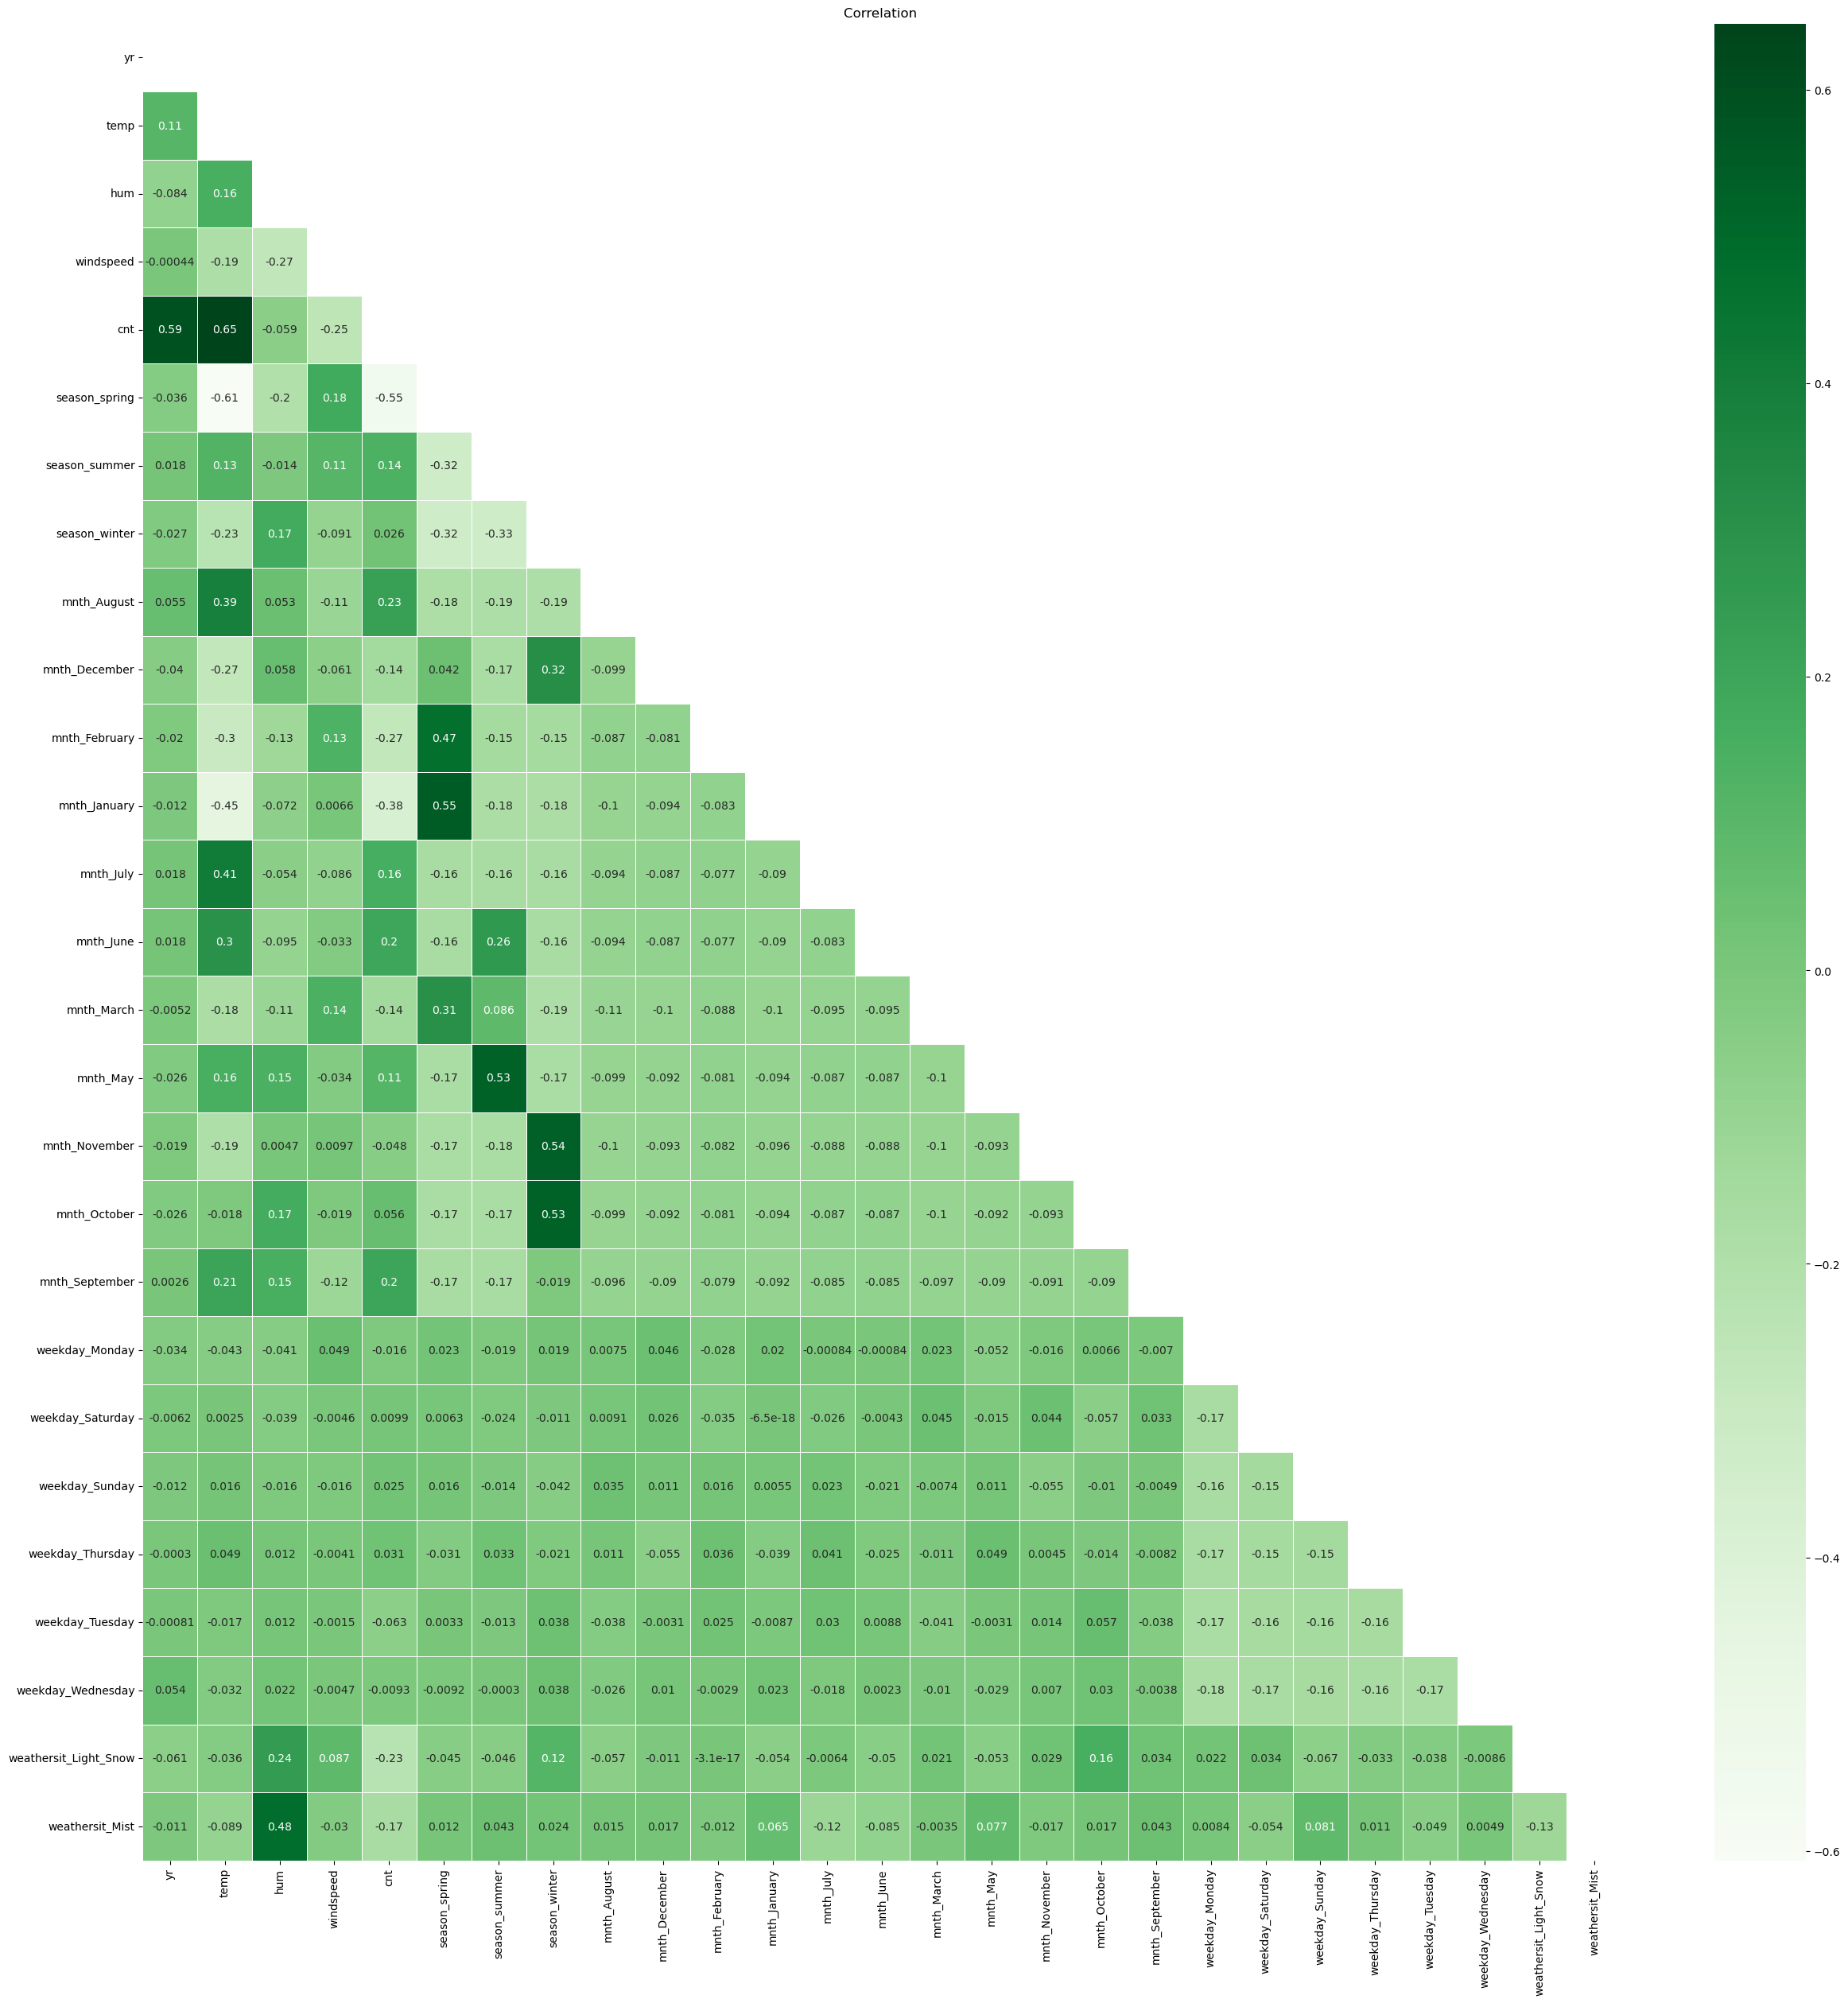

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated
train_corr = bike_train.corr()
plt.figure(figsize = (30, 30))
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_corr, annot=True, linewidth=.5 , mask=mask , cmap="Greens")
plt.title("Correlation ")
plt.show()


#### Summary
- cnt have highest correlation with temp.
- cnt have negative correlation with season_spring, weather_light_snow, mnth_january ,mnth_feburary , windspeed
- cnt have postive correlation with mnth_septmenber, mnth_june ,mnth_august , yr and temp

In [27]:
# Dividing into X and y sets for the model building

y_train = bike_train.pop('cnt')
X_train = bike_train

In [28]:
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   yr                     510 non-null    int64   
 1   holiday                510 non-null    category
 2   workingday             510 non-null    category
 3   temp                   510 non-null    float64 
 4   hum                    510 non-null    float64 
 5   windspeed              510 non-null    float64 
 6   season_spring          510 non-null    uint8   
 7   season_summer          510 non-null    uint8   
 8   season_winter          510 non-null    uint8   
 9   mnth_August            510 non-null    uint8   
 10  mnth_December          510 non-null    uint8   
 11  mnth_February          510 non-null    uint8   
 12  mnth_January           510 non-null    uint8   
 13  mnth_July              510 non-null    uint8   
 14  mnth_June              510 non-null    u

#### Building First model with all the features

In [29]:
X_train_const = sm.add_constant(X_train)
reg = sm.OLS(y_train,X_train_const).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          3.00e-181
Time:                        19:00:35   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2409      0.036      6.786      0.000       0.171       0.311
yr                        0.2324      0.008     28.819      0.000       0.217       0.248
holiday                   0.0067      0.024      0.278      0.781      -0.041       0.054
workingday                0.0929      0.012      7.707      0.000       0.069       0.117
temp                      0.4454      0.046      9.628      0.000       0.354       0.536
hum                      -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring            -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer             0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter             0.1076      0.028      3.853      0.000       0.053       0.163
mnth_August               0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_December            -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_February            -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_January             -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_July                -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_June                 0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_March                0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                  0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_November            -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_October              0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_September            0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Monday            0.0978      0.014      7.231      0.000       0.071       0.124
weekday_Saturday         -0.0036      0.015     -0.248      0.804      -0.032       0.025
weekday_Sunday            0.0055      0.015      0.368      0.713      -0.024       0.035
weekday_Thursday         -0.0124      0.015     -0.844      0.399      -0.041       0.017
weekday_Tuesday           0.0435      0.014      3.173      0.002       0.017       0.070
weekday_Wednesday        -0.0154      0.015     -1.057      0.291      -0.044       0.013
weathersit_Light_Snow    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarqu

#### Summary
- Adjusted R-Square is 0.844 which is excellent. 
- There are numnber of const with high p-value which need addressing like holiday ,mnth_June ,mnth_March ,mnth_October etc

 Instead of manually removing the features indivually .lets use RFE for feature selection 

In [30]:
# Recursive feature elimination for feature selection. 
# lets pick 50% of the features for start. 

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [31]:
rfe_df = pd.DataFrame({'feature':X_train.columns, 'support':rfe.support_,'ranking':rfe.ranking_})
rfe_df.set_index('ranking',inplace=True)
rfe_df.sort_index(ascending=True)

,feature,support
ranking,,
1,yr,True
1,weekday_Monday,True
1,mnth_September,True
1,weathersit_Light_Snow,True
1,mnth_January,True
1,season_winter,True
1,season_summer,True
1,mnth_July,True
1,windspeed,True


In [32]:
#Selecting columns using rfe 
rfe_columns = rfe_df[rfe_df.support].feature
rfe_columns

ranking
1                       yr
1                  holiday
1               workingday
1                     temp
1                      hum
1                windspeed
1            season_spring
1            season_summer
1            season_winter
1             mnth_January
1                mnth_July
1           mnth_September
1           weekday_Monday
1    weathersit_Light_Snow
1          weathersit_Mist
Name: feature, dtype: object

In [33]:
# lets check the rejected columns by RFE 
rfe_df[~rfe_df.support].feature

ranking
6           mnth_August
3         mnth_December
4         mnth_February
12            mnth_June
14           mnth_March
5              mnth_May
2         mnth_November
11         mnth_October
13     weekday_Saturday
10       weekday_Sunday
9      weekday_Thursday
7       weekday_Tuesday
8     weekday_Wednesday
Name: feature, dtype: object

In [34]:
# select column from RFE selected features (columns)
X_train_rfe = X_train[rfe_columns]


In [35]:
# Building First Linear model

X_train_lr_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        19:00:35   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [36]:
# VIF calculator
def calculateVIF(df):
    vif = pd.DataFrame({'feature': df.columns})
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [40]:
calculateVIF(X_train_rfe)

,feature,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Mist,2.29
0,yr,2.09
12,weekday_Monday,1.98


- hum , temp & workingday are showing high VIF
- we will remove feature indiviually to see the impact. removing one feature can change the VIF value, so we should alway remove one by one feature and see the impact. In our case lets start with hum column.

In [42]:
# removing hum column and checking the VIF value for rest of the columns
X_train_new = X_train_rfe.drop('hum',axis=1)
calculateVIF(X_train_new)

,feature,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,yr,2.08
7,season_winter,1.98
11,weekday_Monday,1.97
8,mnth_January,1.62
9,mnth_July,1.59


In [43]:
X_train_lr_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lr_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        19:05:23   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [44]:
# dropping Holiday column with high p-value 
X_train_new = X_train_new.drop(['holiday'],axis=1)
calculateVIF(X_train_new)

,feature,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.33
0,yr,2.08
6,season_winter,1.91
10,weekday_Monday,1.84
7,mnth_January,1.62
8,mnth_July,1.59


In [45]:
X_train_lr_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lr_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          8.68e-189
Time:                        19:08:59   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [46]:
X_train_new = X_train_new.drop(['mnth_January'],axis=1)
calculateVIF(X_train_new)

,feature,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.32
0,yr,2.07
6,season_winter,1.91
9,weekday_Monday,1.83
7,mnth_July,1.58
11,weathersit_Mist,1.57


In [47]:
X_train_lr_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lr_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          7.12e-189
Time:                        19:10:54   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [48]:
X_train_new = X_train_new.drop(['mnth_July'],axis=1)
calculateVIF(X_train_new)

,feature,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,season_spring,2.30
0,yr,2.07
5,season_summer,2.00
8,weekday_Monday,1.83
6,season_winter,1.76
10,weathersit_Mist,1.57
7,mnth_September,1.23


In [49]:
X_train_lr_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lr_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.42e-188
Time:                        19:13:37   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [50]:
X_train_new = X_train_new.drop(['season_spring'],axis=1)
calculateVIF(X_train_new)

,feature,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_Monday,1.69
4,season_summer,1.57
9,weathersit_Mist,1.53
5,season_winter,1.40
6,mnth_September,1.20
8,weathersit_Light_Snow,1.08
